In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import time

from datetime import datetime as dt
from bs4 import BeautifulSoup

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [36]:
USERNAME = "postgres"
PASSWORD = "password"
rds_connection_string = f"{USERNAME}:{PASSWORD}@localhost:5432/Happiness"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [37]:
file2015 = "2015.csv"
file2016 = "2016.csv"
file2017 = "2017.csv"
file2018 = "2018.csv"
file2019 = "2019.csv"
df15 = pd.read_csv(file2015)
df16 = pd.read_csv(file2016)
df17 = pd.read_csv(file2017)
df18 = pd.read_csv(file2018)
df19 = pd.read_csv(file2019)

In [38]:
df15 = df15.drop(columns=['Region', 'Happiness Rank', 'Standard Error', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

In [39]:
df15.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Switzerland,7.587,1.39651,0.94143
1,Iceland,7.561,1.30232,0.94784
2,Denmark,7.527,1.32548,0.87464
3,Norway,7.522,1.45900,0.88521
4,Canada,7.427,1.32629,0.90563


In [40]:
df15 = df15.rename({'Country': 'country', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'economy_gdp', 'Health (Life Expectancy)': 'life_expectancy'}, axis=1)
df15.head()

,country,happiness_score,economy_gdp,life_expectancy
0,Switzerland,7.587,1.39651,0.94143
1,Iceland,7.561,1.30232,0.94784
2,Denmark,7.527,1.32548,0.87464
3,Norway,7.522,1.45900,0.88521
4,Canada,7.427,1.32629,0.90563


In [41]:
df15['year'] = '2015'
df15.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Switzerland,7.587,1.39651,0.94143,2015
1,Iceland,7.561,1.30232,0.94784,2015
2,Denmark,7.527,1.32548,0.87464,2015
3,Norway,7.522,1.45900,0.88521,2015
4,Canada,7.427,1.32629,0.90563,2015


In [42]:
df15.set_index('country')

,happiness_score,economy_gdp,life_expectancy,year
country,,,,
Switzerland,7.587,1.39651,0.94143,2015
Iceland,7.561,1.30232,0.94784,2015
Denmark,7.527,1.32548,0.87464,2015
Norway,7.522,1.45900,0.88521,2015
Canada,7.427,1.32629,0.90563,2015
...,...,...,...,...
Rwanda,3.465,0.22208,0.42864,2015
Benin,3.340,0.28665,0.31910,2015
Syria,3.006,0.66320,0.72193,2015


In [43]:
df15.to_csv('df15.csv') 

In [44]:
df16 = df16.drop(columns=['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
df16.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy)
0,Denmark,7.526,1.44178,0.79504
1,Switzerland,7.509,1.52733,0.86303
2,Iceland,7.501,1.42666,0.86733
3,Norway,7.498,1.57744,0.79579
4,Finland,7.413,1.40598,0.81091


In [45]:
df16 = df16.rename({'Country': 'country', 'Happiness Score': 'happiness_score', 'Economy (GDP per Capita)': 'economy_gdp', 'Health (Life Expectancy)': 'life_expectancy'}, axis=1)
df16.head()

,country,happiness_score,economy_gdp,life_expectancy
0,Denmark,7.526,1.44178,0.79504
1,Switzerland,7.509,1.52733,0.86303
2,Iceland,7.501,1.42666,0.86733
3,Norway,7.498,1.57744,0.79579
4,Finland,7.413,1.40598,0.81091


In [46]:
df16['year'] = '2016'
df16.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Denmark,7.526,1.44178,0.79504,2016
1,Switzerland,7.509,1.52733,0.86303,2016
2,Iceland,7.501,1.42666,0.86733,2016
3,Norway,7.498,1.57744,0.79579,2016
4,Finland,7.413,1.40598,0.81091,2016


In [47]:
df16.set_index('country')

,happiness_score,economy_gdp,life_expectancy,year
country,,,,
Denmark,7.526,1.44178,0.79504,2016
Switzerland,7.509,1.52733,0.86303,2016
Iceland,7.501,1.42666,0.86733,2016
Norway,7.498,1.57744,0.79579,2016
Finland,7.413,1.40598,0.81091,2016
...,...,...,...,...
Benin,3.484,0.39499,0.21028,2016
Afghanistan,3.360,0.38227,0.17344,2016
Togo,3.303,0.28123,0.24811,2016


In [48]:
df16.to_csv('df16.csv')

In [49]:
df17 = df17.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Family', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'])
df17.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.
0,Norway,7.537,1.616463,0.796667
1,Denmark,7.522,1.482383,0.792566
2,Iceland,7.504,1.480633,0.833552
3,Switzerland,7.494,1.564980,0.858131
4,Finland,7.469,1.443572,0.809158


In [50]:
df17 = df17.rename({'Country': 'country', 'Happiness.Score': 'happiness_score', 'Economy..GDP.per.Capita.': 'economy_gdp', 'Health..Life.Expectancy.': 'life_expectancy'}, axis=1)
df17.head()

,country,happiness_score,economy_gdp,life_expectancy
0,Norway,7.537,1.616463,0.796667
1,Denmark,7.522,1.482383,0.792566
2,Iceland,7.504,1.480633,0.833552
3,Switzerland,7.494,1.564980,0.858131
4,Finland,7.469,1.443572,0.809158


In [51]:
df17['year'] = '2017'
df17.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Norway,7.537,1.616463,0.796667,2017
1,Denmark,7.522,1.482383,0.792566,2017
2,Iceland,7.504,1.480633,0.833552,2017
3,Switzerland,7.494,1.564980,0.858131,2017
4,Finland,7.469,1.443572,0.809158,2017


In [52]:
df17.set_index('country')

,happiness_score,economy_gdp,life_expectancy,year
country,,,,
Norway,7.537,1.616463,0.796667,2017
Denmark,7.522,1.482383,0.792566,2017
Iceland,7.504,1.480633,0.833552,2017
Switzerland,7.494,1.564980,0.858131,2017
Finland,7.469,1.443572,0.809158,2017
...,...,...,...,...
Rwanda,3.471,0.368746,0.326425,2017
Syria,3.462,0.777153,0.500533,2017
Tanzania,3.349,0.511136,0.364509,2017


In [53]:
df17.to_csv('df17.csv')

In [54]:
df18 = df18.drop(columns=['Overall rank', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
df18.head()

,Country or region,Score,GDP per capita,Healthy life expectancy
0,Finland,7.632,1.305,0.874
1,Norway,7.594,1.456,0.861
2,Denmark,7.555,1.351,0.868
3,Iceland,7.495,1.343,0.914
4,Switzerland,7.487,1.420,0.927


In [55]:
df18 = df18.rename({'Country or region': 'country', 'Score': 'happiness_score', 'GDP per capita': 'economy_gdp', 'Healthy life expectancy': 'life_expectancy'}, axis=1)
df18.head()

,country,happiness_score,economy_gdp,life_expectancy
0,Finland,7.632,1.305,0.874
1,Norway,7.594,1.456,0.861
2,Denmark,7.555,1.351,0.868
3,Iceland,7.495,1.343,0.914
4,Switzerland,7.487,1.420,0.927


In [56]:
df18['year'] = '2018'
df18.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Finland,7.632,1.305,0.874,2018
1,Norway,7.594,1.456,0.861,2018
2,Denmark,7.555,1.351,0.868,2018
3,Iceland,7.495,1.343,0.914,2018
4,Switzerland,7.487,1.420,0.927,2018


In [106]:
df18.set_index('country')

,happiness_score,economy_gdp,life_expectancy,year
country,,,,
Finland,7.632,1.305,0.874,2018
Norway,7.594,1.456,0.861,2018
Denmark,7.555,1.351,0.868,2018
Iceland,7.495,1.343,0.914,2018
Switzerland,7.487,1.420,0.927,2018
...,...,...,...,...
Yemen,3.355,0.442,0.343,2018
Tanzania,3.303,0.455,0.381,2018
South Sudan,3.254,0.337,0.177,2018


In [58]:
df18.to_csv('df18.csv')

In [59]:
df19 = df19.drop(columns=['Overall rank', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
df19.head()

,Country or region,Score,GDP per capita,Healthy life expectancy
0,Finland,7.769,1.340,0.986
1,Denmark,7.600,1.383,0.996
2,Norway,7.554,1.488,1.028
3,Iceland,7.494,1.380,1.026
4,Netherlands,7.488,1.396,0.999


In [60]:
df19 = df19.rename({'Country or region': 'country', 'Score': 'happiness_score', 'GDP per capita': 'economy_gdp', 'Healthy life expectancy': 'life_expectancy'}, axis=1)
df19.head()

,country,happiness_score,economy_gdp,life_expectancy
0,Finland,7.769,1.340,0.986
1,Denmark,7.600,1.383,0.996
2,Norway,7.554,1.488,1.028
3,Iceland,7.494,1.380,1.026
4,Netherlands,7.488,1.396,0.999


In [61]:
df19['year'] = '2019'
df19.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Finland,7.769,1.340,0.986,2019
1,Denmark,7.600,1.383,0.996,2019
2,Norway,7.554,1.488,1.028,2019
3,Iceland,7.494,1.380,1.026,2019
4,Netherlands,7.488,1.396,0.999,2019


In [62]:
df19.set_index('country')

,happiness_score,economy_gdp,life_expectancy,year
country,,,,
Finland,7.769,1.340,0.986,2019
Denmark,7.600,1.383,0.996,2019
Norway,7.554,1.488,1.028,2019
Iceland,7.494,1.380,1.026,2019
Netherlands,7.488,1.396,0.999,2019
...,...,...,...,...
Rwanda,3.334,0.359,0.614,2019
Tanzania,3.231,0.476,0.499,2019
Afghanistan,3.203,0.350,0.361,2019


In [63]:
df19.to_csv('df19.csv')

In [92]:
merge1 = pd.merge(df15, df16, how='outer', on=None)

In [94]:
merge2 = pd.merge(merge1, df17, how='outer', on=None)

In [95]:
merge3 = pd.merge(merge2, df18, how='outer', on=None)

In [96]:
final_happy = pd.merge(merge3, df19, how='outer', on=None)

In [111]:
final_happy.reset_index(drop=True, inplace=True)

In [114]:
final_happy.head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Switzerland,7.587,1.39651,0.94143,2015
1,Iceland,7.561,1.30232,0.94784,2015
2,Denmark,7.527,1.32548,0.87464,2015
3,Norway,7.522,1.45900,0.88521,2015
4,Canada,7.427,1.32629,0.90563,2015


In [103]:
final_happy.to_csv('final_happy.csv')

In [128]:
annual_happy = final_happy.groupby('year').mean()
annual_happy.head()

,happiness_score,economy_gdp,life_expectancy
year,,,
2015,5.375734,0.846137,0.630259
2016,5.382185,0.953880,0.557619
2017,5.354019,0.984718,0.551341
2018,5.375917,0.891449,0.597346
2019,5.407096,0.905147,0.725244


In [64]:
alcohol_cons = "HappinessAlcoholConsumption.csv"
alcohol_df = pd.read_csv(alcohol_cons)
alcohol_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [65]:
alcohol_df = alcohol_df.drop(columns=['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita'])

In [66]:
alcohol_df = alcohol_df.rename({'Country': 'country', 'Beer_PerCapita': 'beer_percapita', 'Spirit_PerCapita': 'spirit_percapita', 'Wine_PerCapita': 'wine_percapita'}, axis=1)
alcohol_df.head()

,country,beer_percapita,spirit_percapita,wine_percapita
0,Denmark,224,81,278
1,Switzerland,185,100,280
2,Iceland,233,61,78
3,Norway,169,71,129
4,Finland,263,133,97


In [67]:
alcohol_df.to_csv('alcohol_df.csv') 

In [122]:
top_five = alcohol_df.head(5)

In [123]:
top_five

,country,beer_percapita,spirit_percapita,wine_percapita
0,Denmark,224,81,278
1,Switzerland,185,100,280
2,Iceland,233,61,78
3,Norway,169,71,129
4,Finland,263,133,97


In [125]:
bottom_five = alcohol_df.tail(5)
bottom_five

,country,beer_percapita,spirit_percapita,wine_percapita
117,Tanzania,36,6,1
118,Liberia,19,152,2
119,Benin,34,4,13
120,Togo,36,2,19
121,Syria,5,35,16


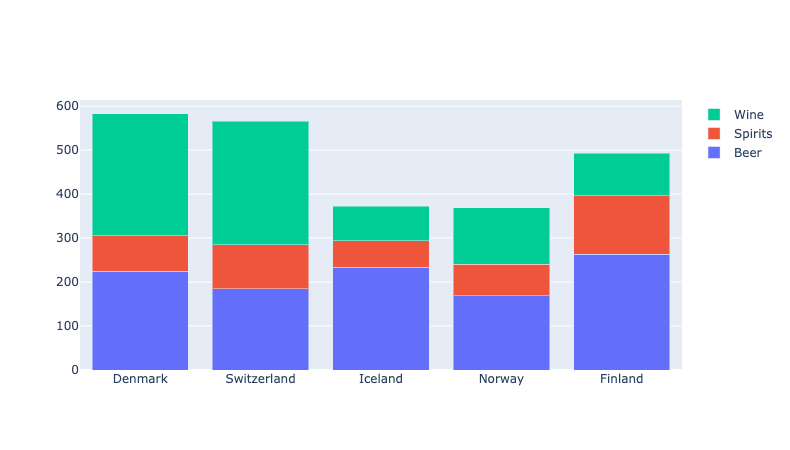

In [124]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Beer', x=top_five["country"], y=top_five["beer_percapita"]),
    go.Bar(name='Spirits', x=top_five["country"], y=top_five["spirit_percapita"]),
    go.Bar(name='Wine', x=top_five["country"], y=top_five["wine_percapita"])
])

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

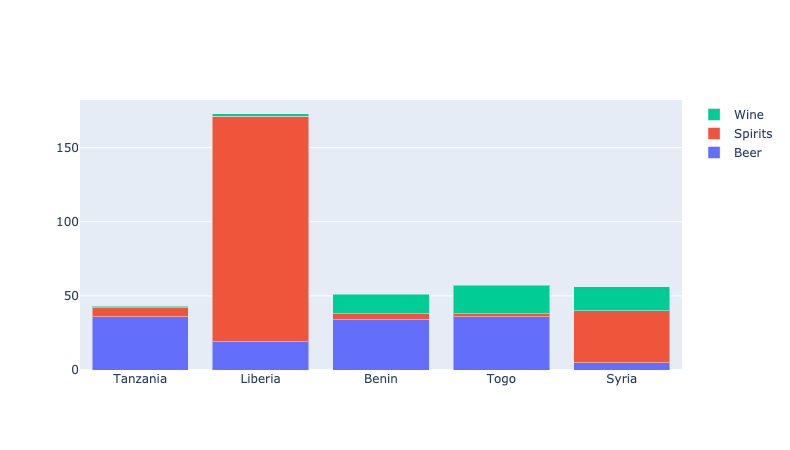

In [126]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Beer', x=bottom_five["country"], y=bottom_five["beer_percapita"]),
    go.Bar(name='Spirits', x=bottom_five["country"], y=bottom_five["spirit_percapita"]),
    go.Bar(name='Wine', x=bottom_five["country"], y=bottom_five["wine_percapita"])
])

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [131]:
final_happy.to_sql(name='Happiness', con=engine, if_exists='append', index=False)

In [132]:
pd.read_sql_query('select * from "Happiness"', con=engine).head()

,country,happiness_score,economy_gdp,life_expectancy,year
0,Switzerland,7.587,1.39651,0.94143,2015
1,Iceland,7.561,1.30232,0.94784,2015
2,Denmark,7.527,1.32548,0.87464,2015
3,Norway,7.522,1.45900,0.88521,2015
4,Canada,7.427,1.32629,0.90563,2015


In [133]:
alcohol_df.to_sql(name='Alcohol', con=engine, if_exists='append', index=False)

In [134]:
pd.read_sql_query('select * from "Alcohol" ', con=engine).head()

,country,beer_percapita,spirit_percapita,wine_percapita
0,Denmark,224,81,278
1,Switzerland,185,100,280
2,Iceland,233,61,78
3,Norway,169,71,129
4,Finland,263,133,97


In [155]:
join_query = 'SELECT h.country, h.year, h.happiness_score, a.beer_percapita, a.spirit_percapita, a.wine_percapita FROM "Happiness" h JOIN "Alcohol" a ON (h.country = a.country);'


join_df = pd.read_sql_query(join_query, con=engine)

In [156]:
join_df

,country,year,happiness_score,beer_percapita,spirit_percapita,wine_percapita
0,Switzerland,2015,7.587,185,100,280
1,Iceland,2015,7.561,233,61,78
2,Denmark,2015,7.527,224,81,278
3,Norway,2015,7.522,169,71,129
4,Canada,2015,7.427,240,122,100
...,...,...,...,...,...,...
689,Chad,2015,3.667,15,1,1
690,Burkina Faso,2015,3.587,25,7,7
691,Benin,2015,3.340,34,4,13
692,Syria,2015,3.006,5,35,16


In [157]:
join_df.to_csv("combined_sql2.csv")

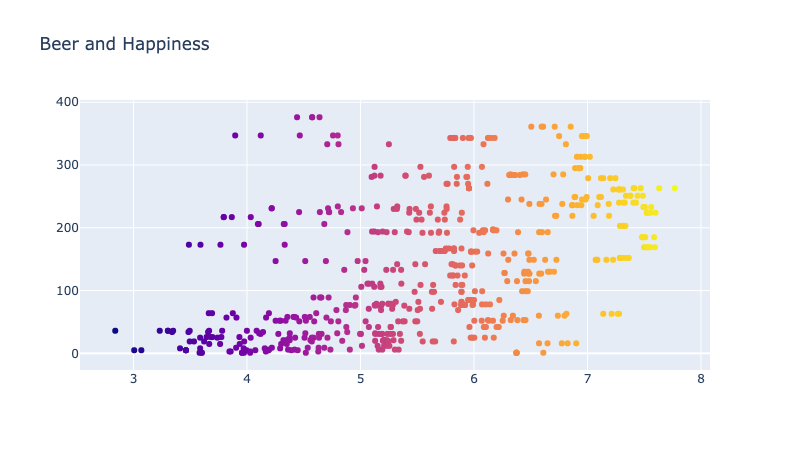

In [147]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=join_df['happiness_score'],
                                y=join_df['beer_percapita'],
                                mode='markers',
                                marker_color=join_df['happiness_score'],
                                text=join_df['country'])) # hover text goes here

fig.update_layout(title='Beer and Happiness')
fig.show()

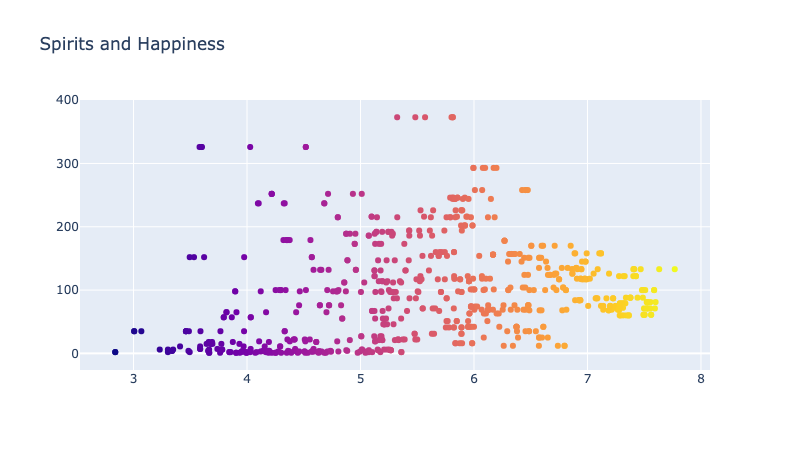

In [159]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=join_df['happiness_score'],
                                y=join_df['spirit_percapita'],
                                mode='markers',
                                marker_color=join_df['happiness_score'],
                                text=join_df['country'])) # hover text goes here

fig.update_layout(title='Spirits and Happiness')
fig.show()

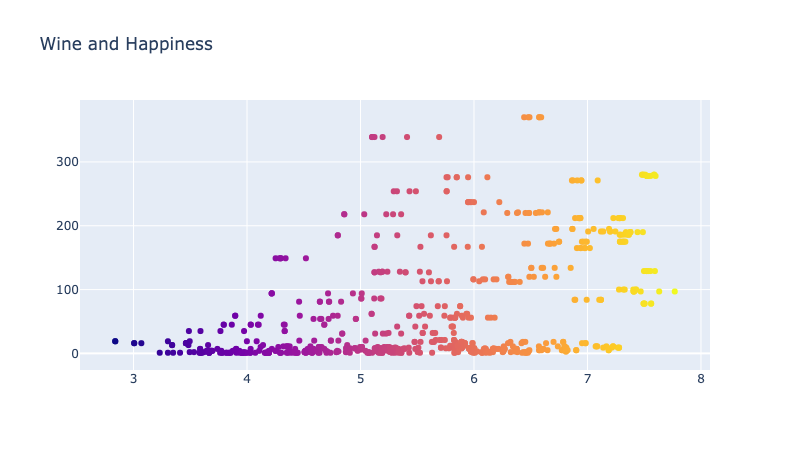

In [160]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=join_df['happiness_score'],
                                y=join_df['wine_percapita'],
                                mode='markers',
                                marker_color=join_df['happiness_score'],
                                text=join_df['country'])) # hover text goes here

fig.update_layout(title='Wine and Happiness')
fig.show()